## Project 3 : Let's talk lobbying: Who are the most active EU lobbyists [and other interesting finds]

### [LobbyFacts](https://lobbyfacts.eu)  is a one-stop-shop of data on EU lobbying in Brussels. Using data drawn, in real time, from the official EU lobby transparency register and the Commission’s published lists of its high-level lobby meetings, LobbyFacts brings together data on lobby spend and turnover; numbers of lobbyists and European Parliament pass-holders; high-level Commission meetings held; country of origin; issues lobbied on; and other info. It offers an extensive dataset on lobbying in the EU, along with a real-time updating [API](http://api.lobbyfacts.eu/docs/api).

In [108]:
import pandas as pd
import matplotlib
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image 
import re
from cycler import cycler
import pylab
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from pywaffle import Waffle
import math

In [3]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor'    : '#FDF6E3',
    'patch.antialiased'   : True,
    'lines.linewidth'     : 2.0,
    'lines.solid_capstyle': 'butt',
    'font.family': 'sans-serif',
    'font.style' : 'normal',
    'font.weight': 'medium',
    'axes.titlesize'      : 'large' , 
    'axes.titleweight'      : 'bold' , 
    'axes.titlepad'       : 32    ,
    'axes.labelsize'      : 12,
    'axes.labelcolor'     : '#657b83',
    'axes.facecolor'      : '#eee8d5',
    'axes.edgecolor'      : '#eee8d5',
    'axes.axisbelow'      : True,
    'axes.prop_cycle'    : cycler('color', ['#749abd', '#c6d3df', '#859900', '#9ea1a3', '#3e5569', '#eff5fb', '#268bd2', '#6c71c4']),
    'axes.grid'           : True,
    'grid.color'          : '#fdf6e3',   
    'grid.linestyle'      : '-',         
    'grid.linewidth'      : 1.5,         
    'xtick.color'         : '#657b83',
    'xtick.direction'     : 'out',
    'ytick.color'         : '#657b83',
    'ytick.direction'     : 'out',
    'text.color'          : '#657b83',
})

In [5]:
df=pd.read_csv("lby.csv")
df.head()

,organisation name,country head office,lobbying costs,EP passes,lobbyists (FTE),# of meetings,registered date
0,Federazione Italiana Giuoco Calcio,Italy,144306566,0,1.0,0,2017-08-04
1,Fundación Internacional y para Iberoamérica de...,Spain,34777770,0,5.0,1,2012-03-01
2,Business and Strategies in Europe,Belgium,19724690,0,5.0,0,2017-02-01
3,Svenska kyrkan,Sweden,13087511,0,0.5,0,2016-12-07
4,European Chemical Industry Council,Belgium,12300000,29,47.0,71,2009-09-24


In [6]:
df.columns = [c.replace(' ', '_') for c in df.columns]

## 1. Who are the most active lobbyists? 

/Users/nickospi/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


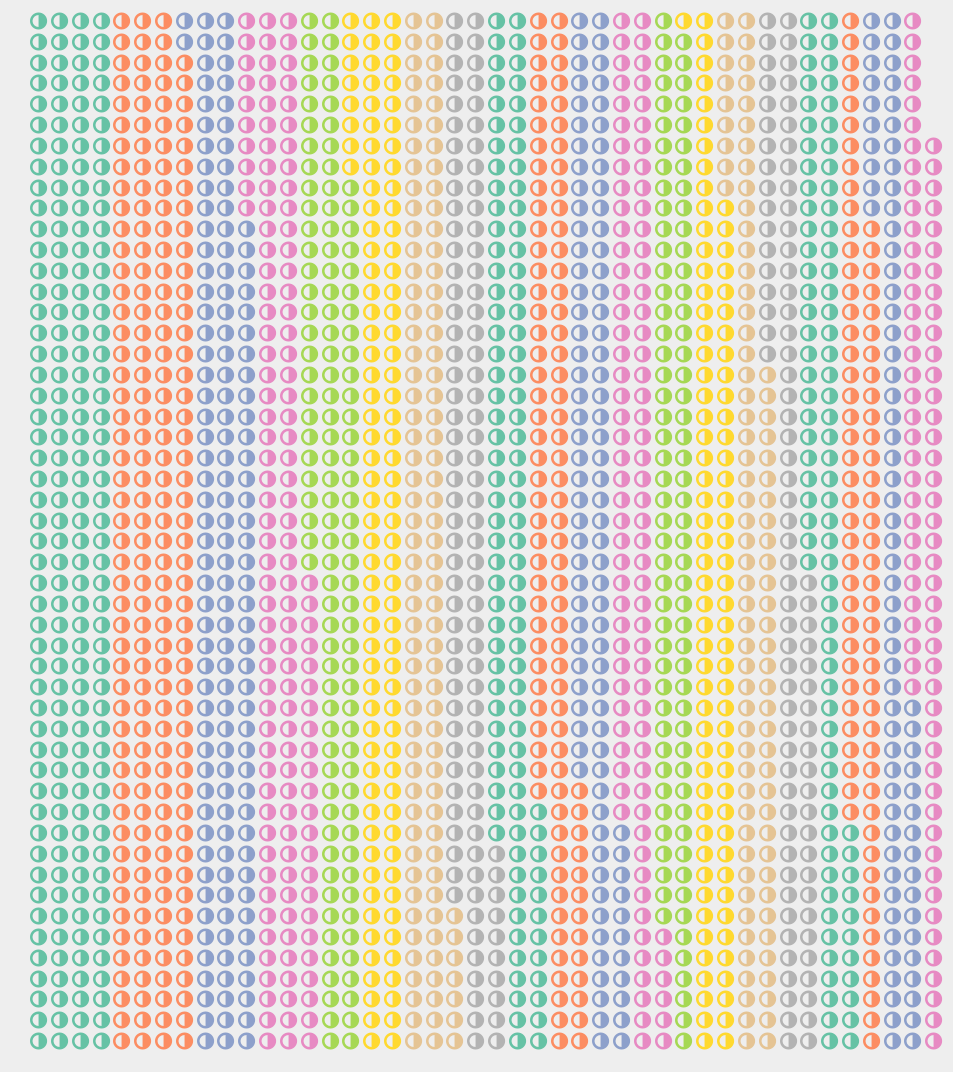

<Figure size 432x288 with 0 Axes>

In [124]:
active = df.sort_values(by='#_of_meetings', ascending=False).head(20)
active['#_of_meetings']=active['#_of_meetings']
#active.plot(x='organisation_name', y='#_of_meetings', kind='pie', figsize=(11,11))
#plt.gca().invert_yaxis()
#bbox_inches="tight"
sizes = [i for i in active['#_of_meetings']]
labels = [i for i in active.organisation_name]
data = active
fig = plt.figure(FigureClass=Waffle, rows=50, values=sizes, figsize=(15,15),icons='adjust', icon_size=20, 
icon_legend=True)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()
plt.savefig('0.pdf')



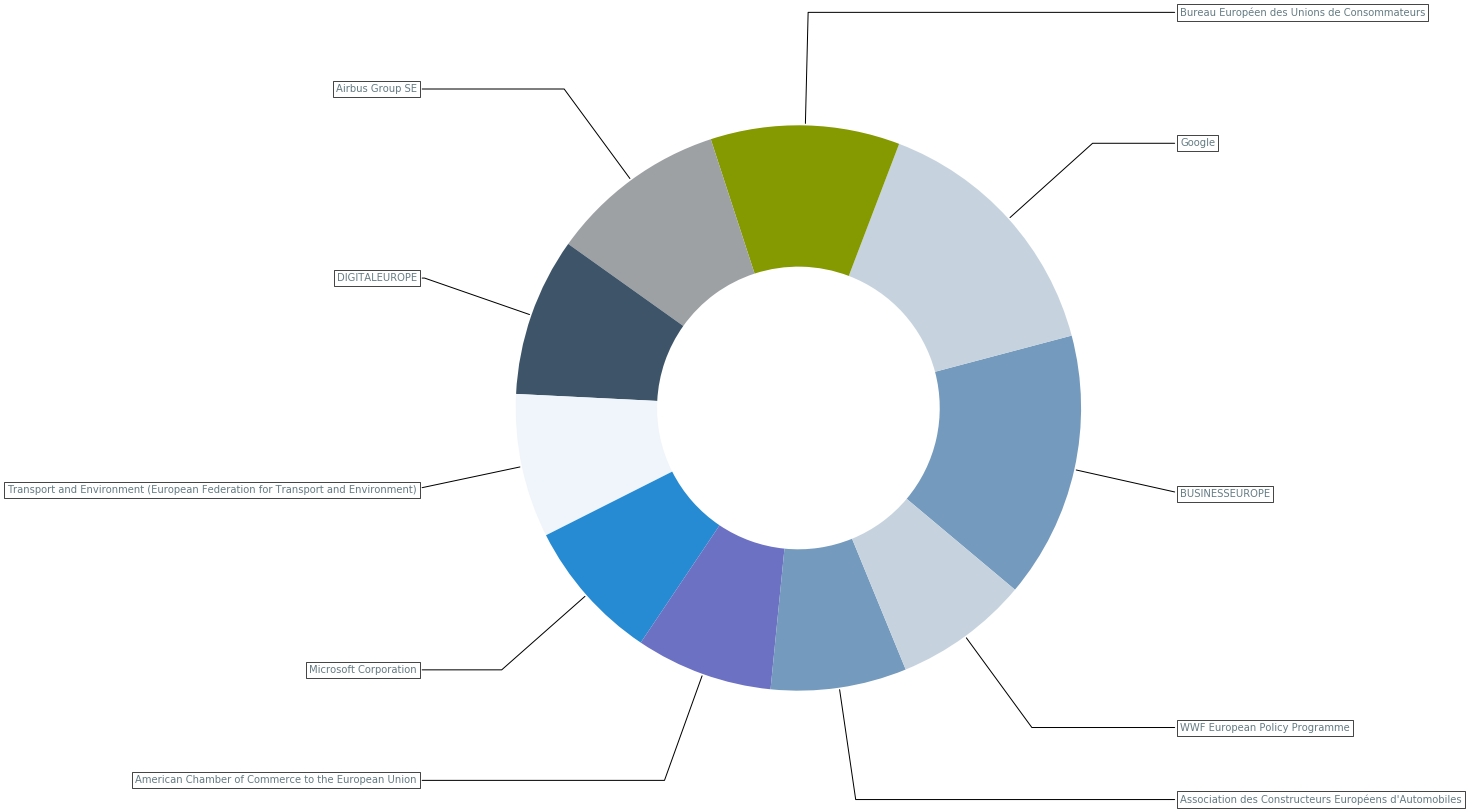

In [132]:
active = df.sort_values(by='#_of_meetings', ascending=False).head(10)
active['#_of_meetings']=active['#_of_meetings']
#active.plot(x='organisation_name', y='#_of_meetings', kind='pie', figsize=(11,11))
#plt.gca().invert_yaxis()
#bbox_inches="tight"
data = [i for i in active['#_of_meetings']]
labels = [i for i in active.organisation_name]



    
fig, ax = plt.subplots(figsize=(15, 13), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)    
    
    
plt.savefig('1_0.pdf')




In [115]:
active

,organisation_name,country_head_office,lobbying_costs,EP_passes,lobbyists_(FTE),#_of_meetings,registered_date
31,BUSINESSEUROPE,Belgium,4000000 - 4249999,24,30.00,100.0,2009-01-13
19,Google,United States,5250000 - 5499999,5,8.25,99.0,2011-03-29
74,Bureau Européen des Unions de Consommateurs,Belgium,2250000 - 2499999,30,25.50,71.0,2008-10-29
128,Airbus Group SE,Netherlands,1500000 - 1749000,8,4.75,66.0,2008-11-26
123,DIGITALEUROPE,Belgium,1900000,14,9.75,60.0,2011-10-26
302,Transport and Environment (European Federation...,Belgium,1000000 - 1249999,21,15.75,54.0,2010-02-22
25,Microsoft Corporation,United States,4500000 - 4749000,4,8.50,54.0,2009-01-13
205,American Chamber of Commerce to the European U...,Belgium,1000000 - 1249999,12,9.00,52.0,2008-10-14
84,Association des Constructeurs Européens d'Auto...,Belgium,2000000 - 2249999,14,10.50,51.0,2008-12-18
98,WWF European Policy Programme,Belgium,2000000 - 2249999,15,21.75,50.0,2008-09-23


## 2. Who are the big spenders? 

In [19]:
df.lobbying_costs = df.lobbying_costs.astype(str)
df1 = df[~df.lobbying_costs.str.contains("< 9,999")]
df1 = df1[~df1.lobbying_costs.str.contains("no figure available")]
df1 = df1.loc[(df1['EP_passes'] > 0)]
df1

,organisation_name,country_head_office,lobbying_costs,EP_passes,lobbyists_(FTE),#_of_meetings,registered_date
4,European Chemical Industry Council,Belgium,12300000,29,47.00,71,2009-09-24
7,JA Europe,Belgium,8000000 - 8249999,4,1.00,9,2015-07-07
8,Human Rights Project Management (former Otkryt...,United Kingdom,7963657,1,0.75,1,2015-09-08
10,FTI Consulting Belgium,United States,6750000 - 6999999,34,48.00,29,2010-04-01
11,Fleishman-Hillard,Belgium,6750000 - 6999999,56,27.75,23,2009-03-17
13,Insurance Europe,Belgium,6500000 - 6749000,25,35.00,36,2010-04-15
14,Burson-Marsteller,Belgium,6250000 - 6499999,50,28.00,5,2008-10-31
15,European Centre for Development Policy Management,Netherlands,6250000 - 6499999,1,37.00,4,2015-01-22
18,European Federation of Pharmaceutical Industri...,Luxembourg,5503206,5,15.75,41,2009-03-04
19,Google,United States,5250000 - 5499999,5,8.25,198,2011-03-29


In [20]:
big_spenders = df1[['organisation_name','lobbying_costs','EP_passes']].head(50)
#big_spenders = df1[['organisation_name','lobbying_costs','EP_passes']].head(20)
big_spenders['lobbying_costs']=big_spenders['lobbying_costs'].astype(str)



In [21]:
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('> 10,000,000','10000000')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('8000000 - 8249999','8124999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('6750000 - 6999999','6874999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('6500000 - 6749000','6624500')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('6250000 - 6499999','6374999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('5500000 - 5749000','5624500')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('5250000 - 5499999','5374999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('2750000 - 2999999','2874999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('3000000 - 3249999','3124999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('3250000 - 3499999','3374999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('3500000 - 3749000','3624500.0')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('3750000 - 3999999','3874999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('4000000 - 4249999','4124999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('4250000 - 4499999','4374999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('4500000 - 4749000','4624500.0')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('4750000 - 4999999','4874999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('2250000 - 2499999','2374999.5')
big_spenders['lobbying_costs']=big_spenders.lobbying_costs.replace('2500000 - 2749000','2624500.0')
big_spenders['lobbying_costs']=big_spenders['lobbying_costs'].astype(float)
#big_spenders.to_csv('bs.csv',index=False)

In [22]:
big_spenders.sort_values(by='lobbying_costs',ascending=False)
big_spenders

,organisation_name,lobbying_costs,EP_passes
4,European Chemical Industry Council,12300000.0,29
7,JA Europe,8124999.5,4
8,Human Rights Project Management (former Otkryt...,7963657.0,1
10,FTI Consulting Belgium,6874999.5,34
11,Fleishman-Hillard,6874999.5,56
13,Insurance Europe,6624500.0,25
14,Burson-Marsteller,6374999.5,50
15,European Centre for Development Policy Management,6374999.5,1
18,European Federation of Pharmaceutical Industri...,5503206.0,5
19,Google,5374999.5,5


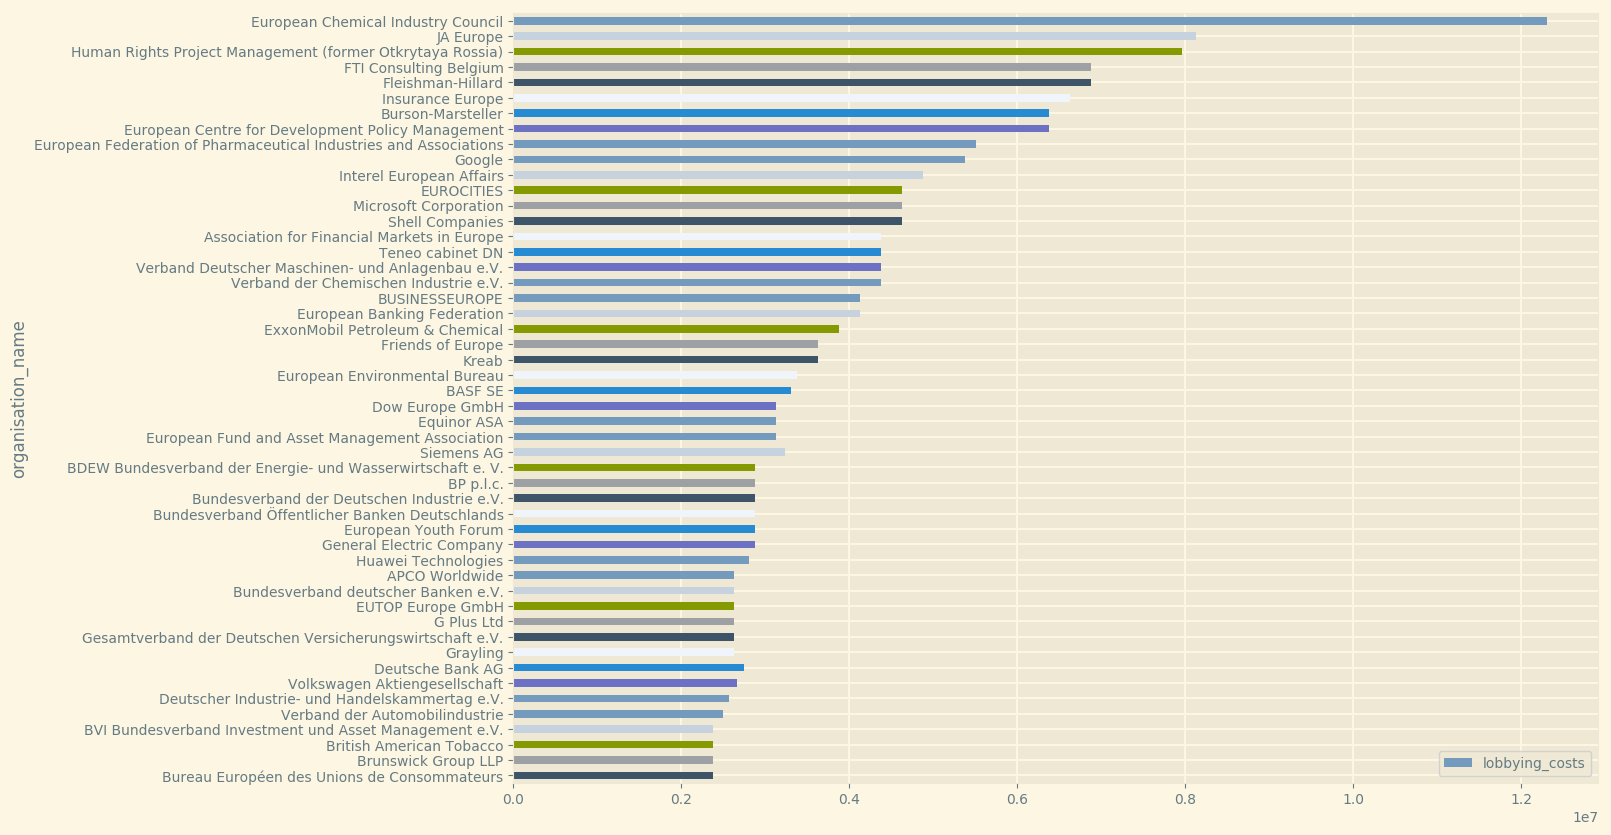

In [23]:
ax=big_spenders.plot(x='organisation_name', y='lobbying_costs', kind='barh', figsize=(14,10))
plt.gca().invert_yaxis()
plt.show()

## 3. 50 top per industry

In [15]:
def get_lobbyists(row):
    driver.get("http://ec.europa.eu/transparencyregister/public/consultation/search.do?locale=en&reset=")
    text_input = driver.find_element_by_id('declaration')
    text_input.send_keys(row['organisation_name'])
    search_button = driver.find_element_by_class_name ('btn')
    search_button.click()
    try:
        name_click = driver.find_element_by_xpath('//*[@id="search"]/div[2]/ul/li[1]/h4/a')
        name_click.click()
        results = driver.find_elements_by_class_name("container")
        for result in results:
            name = result.find_elements_by_class_name("col-sm-7")[0].text
            #result.execute_script("arguments[0].scrollIntoView(true)", name)
            type_comp = result.find_elements_by_class_name("col-sm-7")[2].text
            type_ind = result.find_elements_by_class_name("col-sm-7")[5].text
            #driver.execute_script("arguments[0].scrollIntoView(true)", type_ind)
            return pd.Series({
                'type': type_comp,
                'industry': type_ind,

            })
    except:
        print ('no')

In [24]:
driver = webdriver.Chrome()
big_spenders_f = big_spenders.apply(get_lobbyists, axis=1).join(big_spenders)
big_spenders_f.head()
#big_spenders_f.to_csv('lobby.csv')



In [45]:
dff1=big_spenders_f.groupby(by='industry').lobbying_costs.sum().reset_index('industry')
dff2=big_spenders_f.industry.value_counts().reset_index(name='count')
dff2.columns = ['industry', 'count']
final=pd.merge(dff1,dff2,on='industry')
#final.to_csv('industries.csv')
final

,industry,lobbying_costs,count
0,Companies & groups,47608415.5,14
1,"Non-governmental organisations, platforms and ...",29338155.0,6
2,Professional consultancies,45872497.0,11
3,Think tanks and research institutions,9999499.5,2
4,Trade and business associations,70244701.0,17


In [9]:
#final_50=pd.read_csv("lobby.csv")

In [14]:
ax=final.plot(x='count', y='lobbying_costs', s= final_50.lobbying_costs/30000,kind='scatter', alpha=0.5,figsize=(14,10))
plt.savefig('3.pdf')

## 4. Who is who?

In [1]:
df3=big_spenders_f[big_spenders_f.industry.str.contains("Companies & groups")]
df3
ax=df3.plot(x='EP_passes', y='lobbying_costs', s= df3.lobbying_costs/30000,kind='scatter', alpha=0.5,figsize=(14,10))
plt.show()

NameError: name 'big_spenders_f' is not defined

In [27]:
df4=big_spenders_f[big_spenders_f.industry.str.contains("Trade and business associations")]
ax=df4.plot(x='EP_passes', y='lobbying_costs', s= df4.lobbying_costs/30000,kind='scatter', alpha=0.5,figsize=(14,10))
plt.savefig('5.pdf')

In [28]:
df5=big_spenders_f[big_spenders_f.industry.str.contains("Professional consultancies")]
ax=df5.plot(x='EP_passes', y='lobbying_costs', s= df5.lobbying_costs/30000,kind='scatter', alpha=0.5,figsize=(14,10))
plt.savefig('6.pdf')

In [29]:
df6=big_spenders_f[big_spenders_f.industry.str.contains("Think tanks and research institutions")]
ax=df6.plot(x='EP_passes', y='lobbying_costs', s= df6.lobbying_costs/30000,kind='scatter', alpha=0.5,figsize=(14,10))
plt.savefig('7.pdf')

In [31]:
df7=big_spenders_f[big_spenders_f.industry.str.contains("Non-governmental organisations, platforms")]
ax=df7.plot(x='EP_passes', y='lobbying_costs', s= df7.lobbying_costs/30000,kind='scatter', alpha=0.5,figsize=(14,10))
plt.savefig('8.pdf')